<a href="https://colab.research.google.com/github/ashwinn-v/ConceteCrackClassifier/blob/main/WAConcreteCrackVGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip
!unzip 5y9wdsg2zt-2.zip
!unrar x 'Concrete Crack Images for Classification.rar'

Streaming output truncated to the last 5000 lines.
Extracting  Negative/15002.jpg                                            88%  OK 
Extracting  Negative/15003.jpg                                            88%  OK 
Extracting  Negative/15004.jpg                                            88%  OK 
Extracting  Negative/15005.jpg                                            88%  OK 
Extracting  Negative/15006.jpg                                            88%  OK 
Extracting  Negative/15007.jpg                                            88%  OK 
Extracting  Negative/15008.jpg                                            88%  OK 
Extracting  Negative/15009.jpg                                            88%  OK 
Extracting  Negative/15010.jpg                                            88%  OK 
Extracting  Negative/15011.jpg                                            88%  OK 
Extracting  Negative/15012.jp

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import shutil
os.mkdir("/content/Images")

original = r'/content/Positive'
target = r'/content/Images/Positive'

shutil.move(original,target)

original = r'/content/Negative'
target = r'/content/Images/Negative'

shutil.move(original,target)


'/content/Images/Negative'

In [ ]:
pip install split-folders

In [ ]:
import splitfolders  

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("Images", output="Data1", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

base_dir = '/content/Data1'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_pos_dir = os.path.join(train_dir, 'Positive')
train_neg_dir = os.path.join(train_dir, 'Negative')
val_pos_dir = os.path.join(validation_dir, 'Positive')
val_neg_dir = os.path.join(validation_dir, 'Negative')

Copying files: 40000 files [00:05, 6941.98 files/s]


In [ ]:
from tensorflow import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]


In [ ]:
base_model=VGG16(include_top=False, weights="imagenet", input_shape=(150,150,3))
base_model.trainable=False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(512, activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
  classifier.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=METRICS)

In [ ]:


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = classifier.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Found 32000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/2
100/100 [==============================] - 646s 6s/step - loss: 0.0149 - tp: 996.0000 - fp: 4.0000 - tn: 996.0000 - fn: 4.0000 - accuracy: 0.9960 - precision: 0.9960 - recall: 0.9960 - auc: 0.9999 - val_loss: 0.0089 - val_tp: 474.0000 - val_fp: 1.0000 - val_tn: 523.0000 - val_fn: 2.0000 - val_accuracy: 0.9970 - val_precision: 0.9979 - val_recall: 0.9958 - val_auc: 1.0000
Epoch 2/2
100/100 [==============================] - 646s 6s/step - loss: 0.0151 - tp: 993.0000 - fp: 3.0000 - tn: 997.0000 - fn: 7.0000 - accuracy: 0.9950 - precision: 0.9970 - recall: 0.9930 - auc: 0.9994 - val_loss: 0.0135 - val_tp: 499.0000 - val_fp: 4.0000 - val_tn: 497.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9960 - val_precision: 0.9920 - val_recall: 1.0000 - val_auc: 0.9999


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


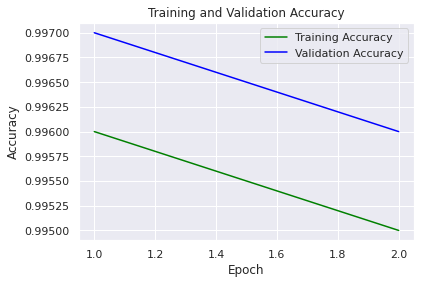

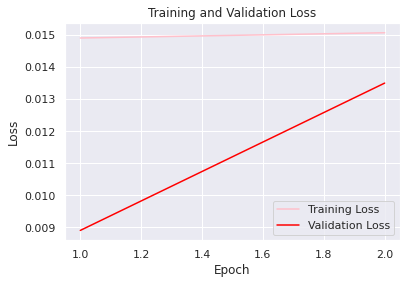

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import tensorflow_addons as tfa